#### 5. What percent of our patients do not have a PCP assigned or haven't seen their PCP recently?

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)

In [2]:
members = pd.read_csv('../Data Files/NSS_GreatCare_Members.csv', parse_dates=[61,62])
admissions = pd.read_csv('../Data Files/NSS_Hospital_Inpatient_Admissions.csv', parse_dates=[8,9])
pcp_visits = pd.read_csv('../Data Files/NSS_PrimaryCare_Office_Visits.csv', parse_dates=[12])

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
current_members = members.loc[members['Period End Date']>'2019-01-01 00:00:00+00:00']
print(len(members))
print(len(current_members))
current_members.value_counts('Period End Date')


61519
6844


Period End Date
2020-01-01 00:00:00+00:00    3732
2019-06-30 00:00:00+00:00      21
2019-03-07 00:00:00+00:00      17
2019-03-02 00:00:00+00:00      17
2019-12-15 00:00:00+00:00      16
                             ... 
2019-02-23 00:00:00+00:00       2
2019-06-07 00:00:00+00:00       2
2019-04-19 00:00:00+00:00       2
2019-11-27 00:00:00+00:00       2
2019-10-20 00:00:00+00:00       1
Length: 365, dtype: int64

In [4]:
patients_grouped_by_period= members.groupby('Patient ID')
patients_grouped_by_period

In [5]:
members.head(100)

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,...,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00:00,2013-04-11 00:00:00+00:00
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,...,0,0,0,0,1,0,0,0,2012-12-10 00:00:00+00:00,2013-01-01 00:00:00+00:00
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,2015-04-18 00:00:00+00:00,2015-05-18 00:00:00+00:00
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2010-01-01 00:00:00+00:00,2010-04-09 00:00:00+00:00
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2012-08-01 00:00:00+00:00,2012-10-02 00:00:00+00:00
5,DS1|10001,DS1|5047X,DS1|1,1,40,1972-11-02,92111.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00:00,2013-01-30 00:00:00+00:00
6,DS1|10002,DS1|5047X,DS1|1,1,23,1988-02-04,90064.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2012-01-01 00:00:00+00:00,2012-02-04 00:00:00+00:00
7,DS1|10003,DS1|5047X,DS1|1,1,24,1991-10-17,91343.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2016-05-07 00:00:00+00:00,2016-10-17 00:00:00+00:00
8,DS1|10004,DS1|5047X,DS1|1,1,9,2003-08-12,91606.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00:00,2013-04-12 00:00:00+00:00
9,DS1|10005,DS1|5047Y,DS1|1,1,55,1957-09-28,94132.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00:00,2013-09-28 00:00:00+00:00


In [6]:
# for ind, row in members.iterrows():
#     patient = row['Patient ID']
#     mask = (pcp_visits['Patient ID']==patient)
#     pcp_visits_subset=pcp_visits[mask].sort_values(by ='Encounter Date', ascending=False).reset_index()
    
#     if len(pcp_visits_subset)==0:
#         members.loc[members['Patient ID']==patient, 'last_PCP_visit'] = None
#         print(ind)
#         continue
#     else:
#         members.loc[members['Patient ID']==patient, 'last_PCP_visit'] = pcp_visits_subset['Encounter Date'][0]
#         members.loc[members['Patient ID']==patient, 'Total_PCP_visits'] = len(pcp_visits_subset)
#         print(ind)
            

In [7]:
# members.sort_values(by ="last_PCP_visit", ascending=False)

In [8]:
# members.columns

In [9]:
# members_cl=members[['Patient ID','Is Patient Alive',
#        'Patient Age Integer', 'Patient Date of Birth',
#        'Patient ZIP Code 5-Digit',
#        'Count Primary Care Visits in Last 36 Months','last_PCP_visit', 'Total_PCP_visits',
#        'Administratively Assigned PCP Provider NPI',
#        'Empirically Attributed PCP Individual Provider NPI',
#        'Empirically Attributed PCP Individual Provider Description',
#        'Empirically Attributed PCP Group Provider NPI',
#        'Empirically Attributed PCP Group Provider Description',
#        'Primary Plan Description', 'Primary Payor Description',
#        'Count Active Plan Memberships',
#        'Period Start Date', 'Period End Date',]]

In [10]:
# members_cl.to_csv('members_dive.csv')

In [11]:
members_dive = pd.read_csv('members_dive.csv', parse_dates=[7,17,18])
members_dive.sort_values('last_PCP_visit', ascending=False).head(50)

,Unnamed: 0,Patient ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,last_PCP_visit,Total_PCP_visits,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Count Active Plan Memberships,Period Start Date,Period End Date
36291,36291,DS1|42660,1,1,2012-01-04,94010.0,2,2019-09-22,9.0,NaN,1.417113e+09,"LEEK, KIMBERLY B.",1.184723e+09,UCSD MEDICAL CENTER,GreatCare Bronze,NaN,1,2013-04-15 00:00:00+00:00,2013-07-22 00:00:00+00:00
58207,58207,DS1|7017,1,47,1971-12-25,92025.0,2,2019-09-16,2.0,NaN,1.265853e+09,"JOEL, NICOLE M.",1.184723e+09,UCSD MEDICAL CENTER,GreatCare Silver,NaN,1,2019-09-16 00:00:00+00:00,2019-12-25 00:00:00+00:00
23560,23560,DS1|31201,1,54,1962-12-14,94112.0,1,2019-08-16,7.0,NaN,1.326398e+09,"DIPAOLO, LAURA H.",1.184723e+09,UCSD MEDICAL CENTER,GreatCare Gold,NaN,1,2017-10-21 00:00:00+00:00,2017-11-04 00:00:00+00:00
44067,44067,DS1|4966,1,39,1974-02-02,94610.0,2,2019-08-10,3.0,NaN,1.750312e+09,"RAHIMIAN, JEANNINE .",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Silver,NaN,1,2013-07-10 00:00:00+00:00,2013-10-01 00:00:00+00:00
26164,26164,DS1|33546,1,13,2003-03-25,91344.0,0,2019-08-05,7.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2016-03-25 00:00:00+00:00,2017-03-25 00:00:00+00:00
32807,32807,DS1|39525,1,68,1948-07-08,92119.0,0,2019-08-01,6.0,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,1,2016-07-08 00:00:00+00:00,2017-07-08 00:00:00+00:00
44552,44552,DS1|50095,1,38,1977-10-16,94591.0,0,2019-07-31,9.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2015-10-16 00:00:00+00:00,2016-10-16 00:00:00+00:00
30669,30669,DS1|37600,1,4,2009-02-13,95742.0,0,2019-07-26,1.0,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,1,2013-11-01 00:00:00+00:00,2014-02-13 00:00:00+00:00
29351,29351,DS1|36414,1,46,1972-12-16,94044.0,2,2019-07-24,5.0,NaN,1.760401e+09,"NIKOUKARI, ARASH .",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Gold,NaN,1,2019-07-24 00:00:00+00:00,2019-12-16 00:00:00+00:00
2183,2183,DS1|11963,1,48,1965-04-18,94117.0,0,2019-07-23,8.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2014-01-01 00:00:00+00:00,2014-04-18 00:00:00+00:00


In [12]:
members_dive_novisit= members_dive[members_dive['Total_PCP_visits'].isna()]
members_dive_novisit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10785 entries, 4 to 61515
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype              
---  ------                                                      --------------  -----              
 0   Unnamed: 0                                                  10785 non-null  int64              
 1   Patient ID                                                  10785 non-null  object             
 2   Is Patient Alive                                            10785 non-null  int64              
 3   Patient Age Integer                                         10785 non-null  int64              
 4   Patient Date of Birth                                       10785 non-null  object             
 5   Patient ZIP Code 5-Digit                                    10706 non-null  float64            
 6   Count Primary Care Visits in Last 36 Months                 10785 non-null  in

In [13]:
mask=members_dive['last_PCP_visit']>='2017-01-01'
members_last36months = members_dive[mask]
members_last36months.sort_values('last_PCP_visit', ascending=True).head(50)

,Unnamed: 0,Patient ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,last_PCP_visit,Total_PCP_visits,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Count Active Plan Memberships,Period Start Date,Period End Date
43373,43373,DS1|49034,1,40,1976-07-26,NaN,6,2017-01-01,6.0,NaN,1.285646e+09,"HO, CANDICE .",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Gold,NaN,1,2017-01-01 00:00:00+00:00,2017-06-18 00:00:00+00:00
59873,59873,DS1|8517,1,22,1996-09-30,90247.0,7,2017-01-01,7.0,NaN,1.043269e+09,"RAHIMI, MARYAM .",1.407059e+09,UC IRVINE UNIVERSITY PHYSICIANS & SURGEONS,GreatCare MA,NaN,1,2018-09-30 00:00:00+00:00,2018-11-20 00:00:00+00:00
14292,14292,DS1|22861,1,30,1979-10-22,90403.0,1,2017-01-01,2.0,NaN,1.609807e+09,"BUI, STEPHANIE K.",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Silver,NaN,1,2010-02-23 00:00:00+00:00,2010-10-22 00:00:00+00:00
23948,23948,DS1|31551,1,45,1971-02-01,92121.0,5,2017-01-01,6.0,NaN,1.750484e+09,"NGUYEN, CHRISTINE K.",1.184723e+09,UCSD MEDICAL CENTER,GreatCare Gold,NaN,1,2016-07-03 00:00:00+00:00,2016-09-25 00:00:00+00:00
37107,37107,DS1|43395,1,51,1961-07-21,90292.0,1,2017-01-01,6.0,NaN,1.508091e+09,"MACKENZIE, TENESSA M.",1.164513e+09,UCSF MEDICAL CENTER,GreatCare Silver,NaN,1,2012-07-21 00:00:00+00:00,2012-08-20 00:00:00+00:00
16105,16105,DS1|24493,1,33,1983-12-01,92103.0,1,2017-01-01,2.0,NaN,1.164667e+09,"ESTES, MICHAEL C.",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Silver,NaN,1,2017-01-01 00:00:00+00:00,2017-12-01 00:00:00+00:00
25108,25108,DS1|32596,1,26,1988-03-29,94112.0,0,2017-01-01,4.0,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,1,2014-03-29 00:00:00+00:00,2014-05-02 00:00:00+00:00
52787,52787,DS1|57507,1,51,1966-06-21,90504.0,2,2017-01-01,7.0,NaN,1.750392e+09,"MCNICOLL, KRYSTYNA .",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Silver,NaN,1,2017-06-21 00:00:00+00:00,2018-01-01 00:00:00+00:00
39255,39255,DS1|45328,1,48,1968-03-09,94116.0,1,2017-01-02,2.0,NaN,1.487699e+09,"GUY, MICHELLE E.",1.164513e+09,UCSF MEDICAL CENTER,GreatCare MA,NaN,1,2016-03-09 00:00:00+00:00,2017-01-02 00:00:00+00:00
40746,40746,DS1|46670,1,26,1993-01-20,90249.0,2,2017-01-02,5.0,NaN,1.942285e+09,"PATRON, NANETTE J.",1.316025e+09,UC DAVIS HEALTH SYSTEM,GreatCare Silver,NaN,1,2019-04-10 00:00:00+00:00,2019-12-11 00:00:00+00:00


In [14]:
mask_noPCP=members_last36months['Count Primary Care Visits in Last 36 Months']==0
members_last36months[mask_noPCP]

,Unnamed: 0,Patient ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,last_PCP_visit,Total_PCP_visits,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Count Active Plan Memberships,Period Start Date,Period End Date
7,7,DS1|10003,1,24,1991-10-17,91343.0,0,2017-07-27,4.0,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,1,2016-05-07 00:00:00+00:00,2016-10-17 00:00:00+00:00
44,44,DS1|10037,1,50,1961-06-05,90254.0,0,2017-01-29,20.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2011-10-31 00:00:00+00:00,2011-11-05 00:00:00+00:00
46,46,DS1|10039,1,16,1997-08-28,95819.0,0,2017-06-22,6.0,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,1,2014-01-01 00:00:00+00:00,2014-04-22 00:00:00+00:00
72,72,DS1|10062,1,28,1983-08-12,95620.0,0,2017-08-25,8.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2011-08-20 00:00:00+00:00,2011-11-26 00:00:00+00:00
85,85,DS1|10074,1,24,1985-06-26,91344.0,0,2018-10-29,4.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2010-01-01 00:00:00+00:00,2010-06-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61044,61044,DS1|9571,1,62,1953-04-13,94122.0,0,2018-03-25,8.0,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,1,2015-10-07 00:00:00+00:00,2016-04-13 00:00:00+00:00
61053,61053,DS1|958,1,27,1984-11-29,92037.0,0,2017-12-07,1.0,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,1,2011-11-29 00:00:00+00:00,2012-02-17 00:00:00+00:00
61119,61119,DS1|9639,1,32,1981-06-12,92129.0,0,2017-03-13,2.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2014-02-13 00:00:00+00:00,2014-06-12 00:00:00+00:00
61292,61292,DS1|9795,1,41,1976-11-15,95826.0,0,2018-09-26,1.0,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,1,2017-11-15 00:00:00+00:00,2018-09-26 00:00:00+00:00


In [15]:
noPCPlast36months = len(members_last36months[mask_noPCP])
totalvisited36months = len(members_last36months)
percent_noPCPlast36months = round((noPCPlast36months/totalvisited36months)*100,2)
print(f"Between 2017-2019(last 36 months of dataset), {totalvisited36months} members have at least one PCP visit.\n"
     f"Out of that number, there are {noPCPlast36months} members who do NOT have an assigned PCP.\n"
     f"Therefore, {percent_noPCPlast36months}% of members with a PCP visit in the last 36 months do NOT have an assigned PCP.")

Between 2017-2019(last 36 months of dataset), 2852 members have at least one PCP visit.
Out of that number, there are 893 members who do NOT have an assigned PCP.
Therefore, 31.31% of members with a PCP visit in the last 36 months do NOT have an assigned PCP.


In [16]:
by_year = members_dive.groupby(pd.Grouper(key='last_PCP_visit',freq='Y')).count()

In [17]:
by_year['Unnamed: 0'].sum()

50734

In [31]:
mask_noPCP=members_dive['Count Primary Care Visits in Last 36 Months']==0
members_noPCP = members_dive[mask_noPCP]
by_year_noPCP = members_noPCP.groupby(pd.Grouper(key='last_PCP_visit',freq='Y')).count()

AttributeError: 'TimeGrouper' object has no attribute 'years'

In [19]:
b=520+296+77
b

893

In [20]:
by_year_noPCP

,Unnamed: 0,Patient ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Total_PCP_visits,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Count Active Plan Memberships,Period Start Date,Period End Date
last_PCP_visit,,,,,,,,,,,,,,,,,,
2009-12-31,23,23,23,23,23,23,23,23,0,0,0,0,0,23,0,23,23,23
2010-12-31,760,760,760,760,760,756,760,760,0,0,0,0,0,760,0,760,760,760
2011-12-31,1972,1972,1972,1972,1972,1959,1972,1972,0,0,0,0,0,1972,0,1972,1972,1972
2012-12-31,2795,2795,2795,2795,2795,2771,2795,2795,0,0,0,0,0,2795,0,2795,2795,2795
2013-12-31,3380,3380,3380,3380,3380,3353,3380,3380,0,0,0,0,0,3380,0,3380,3380,3380
2014-12-31,3891,3891,3891,3891,3891,3860,3891,3891,0,0,0,0,0,3891,0,3891,3891,3891
2015-12-31,3096,3096,3096,3096,3096,3075,3096,3096,0,0,0,0,0,3096,0,3096,3096,3096
2016-12-31,1911,1911,1911,1911,1911,1906,1911,1911,0,0,0,0,0,1911,0,1911,1911,1911
2017-12-31,520,520,520,520,520,518,520,520,0,0,0,0,0,520,0,520,520,520


In [21]:
by_year_merged = by_year.iloc[:,0:1].rename(columns={'Unnamed: 0':'count_members_lastPCPvisit_ingivenyear'})
by_year_merged['count_noPCP']=by_year_noPCP['Unnamed: 0']
by_year_merged['Percent_noPCP']=round((by_year_merged['count_noPCP']/by_year_merged['count_members_lastPCPvisit_ingivenyear'])*100,2)
by_year_merged_sorted= by_year_merged.sort_values('last_PCP_visit', ascending=False)
by_year_merged_sorted

,count_members_lastPCPvisit_ingivenyear,count_noPCP,Percent_noPCP
last_PCP_visit,,,
2019-12-31,191,77,40.31
2018-12-31,850,296,34.82
2017-12-31,1811,520,28.71
2016-12-31,5423,1911,35.24
2015-12-31,9617,3096,32.19
2014-12-31,10906,3891,35.68
2013-12-31,8896,3380,37.99
2012-12-31,6874,2795,40.66
2011-12-31,4512,1972,43.71


In [22]:
#Add totals row above
total_members = len(members_dive)
total_members_noPCPvisit = members_dive['Total_PCP_visits'].isna().sum()
total_members_yesPCPvisit = by_year['Unnamed: 0'].sum()
total_members_yesPCPvisit_noPCP=by_year_noPCP['Unnamed: 0'].sum()

print(f"total GreatCare members: {total_members}\n"
        f"total GreatCare members who have never visited a PCP: {total_members_noPCPvisit}\n"
        f"total GreatCare members who have visited a PCP: {total_members_yesPCPvisit}\n"
        f"total GreatCare members who have visited a PCP but do NOT have an assigned PCP: {total_members_yesPCPvisit_noPCP}")

total GreatCare members: 61519
total GreatCare members who have never visited a PCP: 10785
total GreatCare members who have visited a PCP: 50734
total GreatCare members who have visited a PCP but do NOT have an assigned PCP: 18721


In [23]:
by_year_merged_sorted.to_csv('PCP_visits_by_year.csv')

In [27]:
by_year_merged_sorted.columns

Index(['count_members_lastPCPvisit_ingivenyear', 'count_noPCP',
       'Percent_noPCP'],
      dtype='object')

In [28]:
by_year_merged_sorted = by_year_merged_sorted.reset_index()
by_year_merged_sorted.columns = by_year_merged_sorted.columns.map(''.join)
by_year_merged_sorted

,last_PCP_visit,count_members_lastPCPvisit_ingivenyear,count_noPCP,Percent_noPCP
0,2019-12-31,191,77,40.31
1,2018-12-31,850,296,34.82
2,2017-12-31,1811,520,28.71
3,2016-12-31,5423,1911,35.24
4,2015-12-31,9617,3096,32.19
5,2014-12-31,10906,3891,35.68
6,2013-12-31,8896,3380,37.99
7,2012-12-31,6874,2795,40.66
8,2011-12-31,4512,1972,43.71
9,2010-12-31,1570,760,48.41


In [29]:
by_year_merged_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   last_PCP_visit                          11 non-null     datetime64[ns]
 1   count_members_lastPCPvisit_ingivenyear  11 non-null     int64         
 2   count_noPCP                             11 non-null     int64         
 3   Percent_noPCP                           11 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 480.0 bytes


In [39]:
by_year_merged_sorted['last_PCP_visit']=by_year_merged_sorted['last_PCP_visit'].dt.year

In [58]:
by_year_merged_sorted=by_year_merged_sorted.astype(str)
by_year_merged_sorted.columns

Index(['last_PCP_visit', 'count_members_lastPCPvisit_ingivenyear',
       'count_noPCP', 'Percent_noPCP'],
      dtype='object')

In [61]:
rename_columns = {'last_PCP_visit':'Year', 'count_members_lastPCPvisit_ingivenyear':'Members with PCP',
       'count_noPCP': 'Members w/o PCP', 'Percent_noPCP':'% Members w/o PCP'}
by_year_merged_sorted= by_year_merged_sorted.rename(columns=rename_columns)

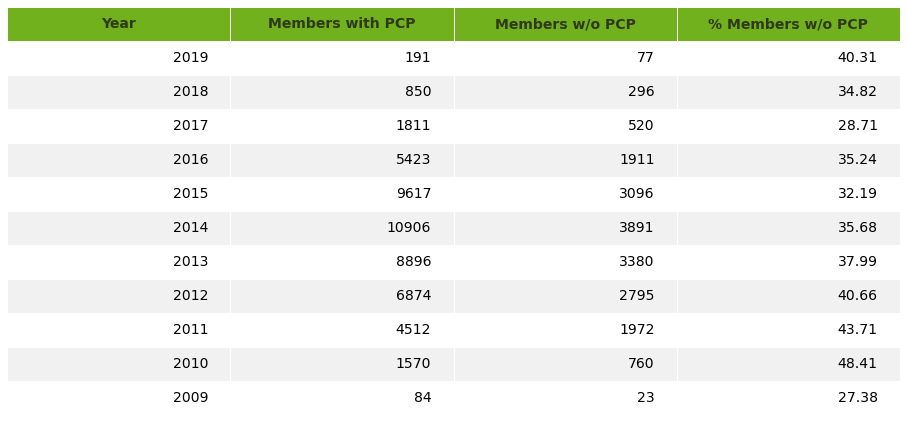

In [70]:
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#70b11d', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='#31391c')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

table1 = render_mpl_table(by_year_merged_sorted, header_columns=0, col_width=4.0)
plt.savefig('PCP_table')